In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-detection/valid/0/2030_992775426_png.rf.df85416a26dd4cb665bb104d6a34d303.jpg
/kaggle/input/breast-cancer-detection/valid/0/2564_1570678080_png.rf.135a908f06be029039778a6df2ab5149.jpg
/kaggle/input/breast-cancer-detection/valid/0/2704_781524556_png.rf.c3007300f84e02ef651821761af1c8a9.jpg
/kaggle/input/breast-cancer-detection/valid/0/294_2044098614_png.rf.1f17493146bfa674226f43a711f6c141.jpg
/kaggle/input/breast-cancer-detection/valid/0/866_1033311478_png.rf.ff97b307c7b296343424c8e5aa172c27.jpg
/kaggle/input/breast-cancer-detection/valid/0/370_1943620586_png.rf.6b2845edfbb223f65f126beabd7aee6a.jpg
/kaggle/input/breast-cancer-detection/valid/0/2546_730952035_png.rf.0aa3bdf9935f0ebed78558c5259bc6bb.jpg
/kaggle/input/breast-cancer-detection/valid/0/2282_2092132689_png.rf.8b110ae2768e8650d7b30dce6ed00e36.jpg
/kaggle/input/breast-cancer-detection/valid/0/561_1308043124_png.rf.e7f17d151c0e2df684b5569befe144f1.jpg
/kaggle/input/breast-cancer-detection/valid/0/2112_19

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
import glob
train_0_path='/kaggle/input/breast-cancer-detection/train/0'
train_1_path='/kaggle/input/breast-cancer-detection/test/1'
test_0_path='/kaggle/input/breast-cancer-detection/test/0'
test_1_path='/kaggle/input/breast-cancer-detection/test/1'
valid_0_path='/kaggle/input/breast-cancer-detection/valid/0'
valid_1_path='/kaggle/input/breast-cancer-detection/valid/1'

In [4]:
train_0_files=glob.glob(train_0_path+'/*')
train_1_files=glob.glob(train_1_path+'/*')
test_0_files=glob.glob(test_0_path+'/*')
test_1_files=glob.glob(test_1_path+'/*')
valid_0_files=glob.glob(valid_0_path+'/*')
valid_1_files=glob.glob(valid_1_path+'/*')

In [5]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_valid=[]
y_valid=[]
for files in train_0_files:
    x_train.append(files)
    y_train.append(0)
for files in train_1_files:
    x_train.append(files)
    y_train.append(1)
for files in test_0_files:
    x_test.append(files)
    y_test.append(0)
for files in test_1_files:
    x_test.append(files)
    y_test.append(1)
for files in valid_0_files:
    x_valid.append(files)
    y_valid.append(0)
for files in valid_1_files:
    x_valid.append(files)
    y_valid.append(1)

In [6]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
print(len(x_valid))
print(len(y_valid))

1697
1697
336
336
675
675


In [7]:
num_0_train=0
num_1_train=0
num_0_test=0
num_1_test=0
num_0_valid=0
num_1_valid=0
for label in y_train:
    if label==0:
        num_0_train+=1
    else:
        num_1_train+=1
for label in y_test:
    if label==0:
        num_0_test+=1
    else :
        num_1_test+=1
for label in y_valid:
    if label==0:
        num_0_valid+=1
    else :
        num_1_valid+=1
print(num_0_train)
print(num_1_train)
print(num_0_test)
print(num_1_test)
print(num_0_valid)
print(num_1_valid)

1569
128
208
128
448
227


Image dimensions: (640, 640, 3)


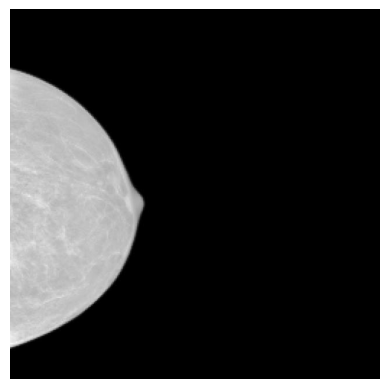

In [8]:
import cv2
import matplotlib.pyplot as plt
image= cv2.imread(x_train[0])
if image is not None:
    print("Image dimensions:", image.shape)

    plt.imshow(image)
    plt.axis('off') 
    plt.show()
else:
    print("Error")

In [9]:
x_train_images=[]
x_test_images=[]
x_valid_images=[]
import cv2
for i in range(len(x_train)):
    img=cv2.imread(x_train[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_train_images.append(img)
for i in range(len(x_test)):
    img=cv2.imread(x_test[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_test_images.append(img)
for i in range(len(x_valid)):
    img=cv2.imread(x_valid[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_valid_images.append(img)

In [10]:
import numpy as np


x_train_images_np = np.array(x_train_images)
x_test_images_np = np.array(x_test_images)
x_valid_images_np = np.array(x_valid_images)


data = np.concatenate((x_train_images_np, x_test_images_np, x_valid_images_np), axis=0)


data.shape

(2708, 224, 224)

In [11]:
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
y_valid_np = np.array(y_valid)


labels = np.concatenate([y_train_np, y_test_np, y_valid_np])

labels.shape

(2708,)

In [12]:
from sklearn.utils import shuffle


data, labels = shuffle(data,labels)

Image dimensions: (224, 224)


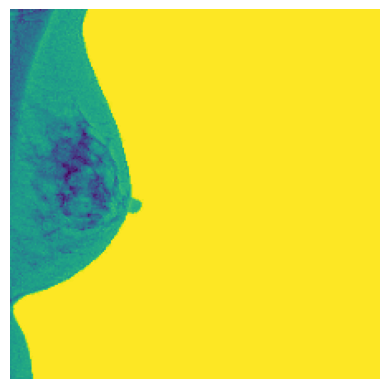

In [13]:
image= data[0]
if image is not None:
    print("Image dimensions:", image.shape)

    plt.imshow(image)
    plt.axis('off')  
    plt.show()
else:
    print("Error")

In [14]:
num_0 = np.sum(labels == 0)
num_1 = np.sum(labels == 1)
print(num_0)
print(num_1)

2225
483


In [15]:
x_train_flat = x_train_images_np.reshape(x_train_images_np.shape[0], -1)
x_test_flat = x_test_images_np.reshape(x_test_images_np.shape[0], -1)
x_valid_flat = x_valid_images_np.reshape(x_valid_images_np.shape[0], -1)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsTransformer

lr = LogisticRegression(max_iter=200)
lr.fit(x_train_flat, y_train_np)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [17]:
y_test_pred = lr.predict(x_test_flat)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test_np, y_test_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.98


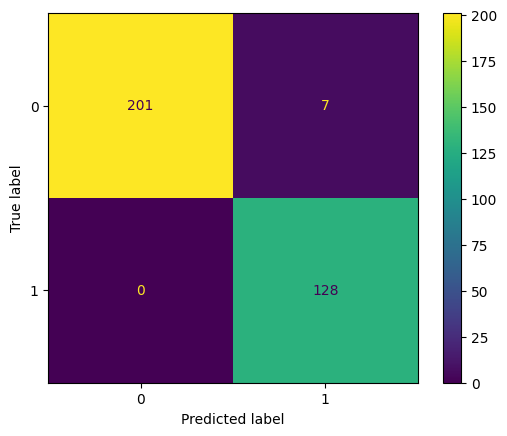

In [19]:
cm_log_reg = confusion_matrix(y_test_np, y_test_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()

KNN Accuracy: 0.63


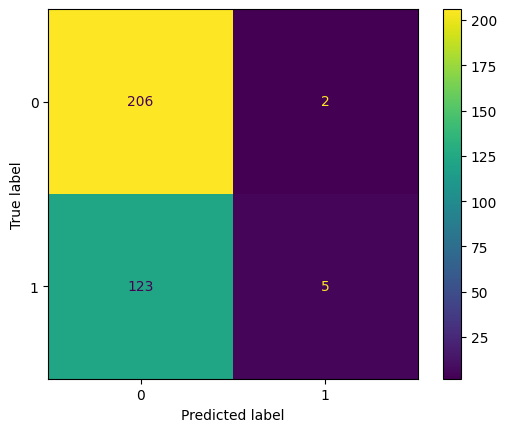

In [20]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train_flat, y_train_np)


y_test_pred_knn = knn.predict(x_test_flat)


accuracy_knn = accuracy_score(y_test_np, y_test_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


cm_knn = confusion_matrix(y_test_np, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
